<a href="https://colab.research.google.com/github/VISH-creater11/GEL_ELECTROPHOROSIS/blob/main/Copy_of_GEL_ELECTROPOROSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install libopencv-dev cmake g++ libomp-dev
!pip install opencv-python

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,835 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,153 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,488 kB]
Get:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubu

In [ ]:
%%writefile main.cpp
#include <iostream>
#include <opencv2/opencv.hpp>
#include <omp.h>
#include <chrono>
using namespace std;
using namespace cv;
int main() {
Mat img= imread("gel.jpg", IMREAD_GRAYSCALE);
if (img.empty()) {
cout << "Error: Cannot open image!" << endl;
return -1;
}
Mat blurred, binary, edges;
               auto start_blur=std::chrono::high_resolution_clock::now();
#pragma omp parallel
{
}
#pragma omp single
GaussianBlur(img, blurred, Size(5, 5), 0);
auto stop_blur = std::chrono::high_resolution_clock::now();
auto duration_blur =
std::chrono::duration_cast<std::chrono::milliseconds>(stop_blur -
start_blur);
std::cout << "Gaussian Blur Execution time: " << duration_blur.count() << " milliseconds" << std::endl;
auto start_threshold = std::chrono::high_resolution_clock::now();
#pragma omp parallel
{
#pragma omp single
adaptiveThreshold(blurred, binary, 255, ADAPTIVE_THRESH_MEAN_C,
THRESH_BINARY, 15, 5);
}
auto stop_threshold = std::chrono::high_resolution_clock::now();
auto duration_threshold =
std::chrono::duration_cast<std::chrono::milliseconds>(stop_threshold -
start_threshold);
std::cout << "Threshold Execution time: " << duration_threshold.count() << " milliseconds" << std::endl;
auto start_sobel = std::chrono::high_resolution_clock::now();
#pragma omp parallel
               {
#pragma omp single
Sobel(binary, edges, CV_8U, 1, 0, 3);
}
auto stop_sobel = std::chrono::high_resolution_clock::now();
auto duration_sobel = std::chrono::duration_cast
<std::chrono::milliseconds>(stop_sobel - start_sobel);
std::cout << "Sobel Execution time: " << duration_sobel.count() << " milliseconds" << std::endl;
imwrite("Original_Gel_Image.jpg", img);
imwrite("Blurred_Image.jpg", blurred);
imwrite("Thresholded_Image.jpg", binary);
imwrite("Detected_Bands.jpg", edges);
return 0;
}

Overwriting main.cpp


In [ ]:
!g++ main.cpp -o main `pkg-config --cflags --libs opencv4` -fopenmp

In [ ]:
from google.colab import files
files.upload()   # upload gel.jpg


Saving GEL.jpg to GEL.jpg


{'GEL.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00x\x00x\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x014\x01\x9a\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x

In [ ]:
%%writefile gel_processing.cpp
#include <iostream>
#include <opencv2/opencv.hpp>
#include <omp.h>
#include <chrono>
using namespace std;
using namespace cv;

int main() {
    Mat img = imread("gel.jpg", IMREAD_GRAYSCALE);
    if (img.empty()) {
        cout << "Error: Cannot open image!" << endl;
        return -1;
    }

    Mat blurred, binary, edges;

    auto start_blur = chrono::high_resolution_clock::now();
    #pragma omp parallel
    {
        #pragma omp single
        GaussianBlur(img, blurred, Size(5, 5), 0);
    }
    auto stop_blur = chrono::high_resolution_clock::now();
    cout << "Gaussian Blur done\n";

    auto start_threshold = chrono::high_resolution_clock::now();
    #pragma omp parallel
    {
        #pragma omp single
        adaptiveThreshold(blurred, binary, 255,
                          ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY, 15, 5);
    }
    auto stop_threshold = chrono::high_resolution_clock::now();
    cout << "Threshold done\n";

    auto start_sobel = chrono::high_resolution_clock::now();
    #pragma omp parallel
    {
        #pragma omp single
        Sobel(binary, edges, CV_8U, 1, 0, 3);
    }
    auto stop_sobel = chrono::high_resolution_clock::now();
    cout << "Sobel done\n";

    imwrite("Original_Gel_Image.jpg", img);
    imwrite("Blurred_Image.jpg", blurred);
    imwrite("Thresholded_Image.jpg", binary);
    imwrite("Detected_Bands.jpg", edges);

    return 0;
}


Writing gel_processing.cpp


In [ ]:
!g++ gel_processing.cpp -o gel_processing `pkg-config --cflags --libs opencv4` -fopenmp


In [ ]:
!mv GEL.jpg gel.jpg


In [ ]:
!./gel_processing


Gaussian Blur done
Threshold done
Sobel done


In [ ]:
!ls -l


total 268
-rw-r--r-- 1 root root 20835 Nov 27 18:06 Blurred_Image.jpg
-rw-r--r-- 1 root root 51380 Nov 27 18:06 Detected_Bands.jpg
-rw-r--r-- 1 root root 25010 Nov 27 18:02 gel.jpg
-rwxr-xr-x 1 root root 31672 Nov 27 18:03 gel_processing
-rw-r--r-- 1 root root  1396 Nov 27 18:03 gel_processing.cpp
-rwxr-xr-x 1 root root 32952 Nov 27 17:55 main
-rw-r--r-- 1 root root  1789 Nov 27 17:54 main.cpp
-rw-r--r-- 1 root root 23593 Nov 27 18:06 Original_Gel_Image.jpg
drwxr-xr-x 1 root root  4096 Nov 20 14:30 sample_data
-rw-r--r-- 1 root root 60318 Nov 27 18:06 Thresholded_Image.jpg


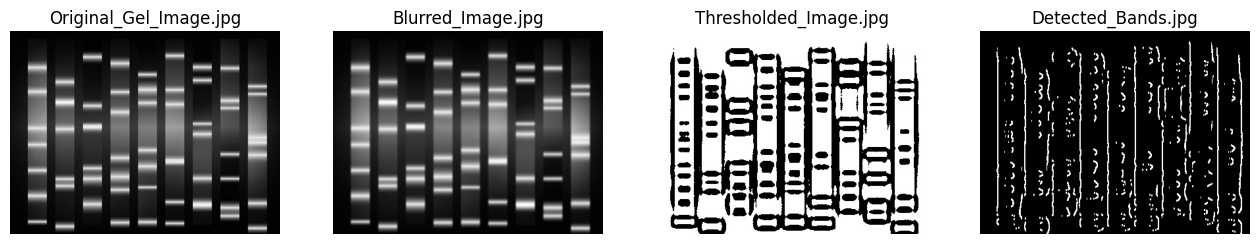

In [ ]:
import cv2
import matplotlib.pyplot as plt

images = [
    "Original_Gel_Image.jpg",
    "Blurred_Image.jpg",
    "Thresholded_Image.jpg",
    "Detected_Bands.jpg"
]

plt.figure(figsize=(16,5))

for i, img_name in enumerate(images):
    img = cv2.imread(img_name, 0)
    plt.subplot(1, 4, i + 1)
    if img is not None:
        plt.imshow(img, cmap='gray')
        plt.title(img_name)
    else:
        plt.title(f"{img_name} not found")
    plt.axis('off')

plt.show()


In [ ]:
import torch, time

def cpu_task():
    s = 0
    for i in range(10**7):
        s += i
    return s

def gpu_task():
    if not torch.cuda.is_available():
        print("GPU not available, running CPU instead")
        return cpu_task()
    a = torch.randn(1000,1000, device='cuda')
    b = torch.randn(1000,1000, device='cuda')
    return (a @ b)

start = time.time()
cpu_task()
print("CPU Runtime:", time.time() - start)

start = time.time()
gpu_task()
print("GPU Runtime:", time.time() - start)


CPU Runtime: 0.5616486072540283
GPU not available, running CPU instead
GPU Runtime: 0.5908851623535156
